In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [70]:
%matplotlib inline

In [71]:
df = pd.read_csv("./data/rotten_tomatoes_data/train.tsv", sep="\t")
df_test = pd.read_csv("./data/rotten_tomatoes_data/test.tsv", sep="\t")
df.shape

(156060, 4)

In [72]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [73]:
def print_sentence(df, sentence_id=None):
    if not sentence_id:
        sentence_ids = df_test.SentenceId.unique()
        sentence_id = np.random.choice(sentence_ids)
    print("Sentence ID = {}".format(sentence_id))
    return df[df.SentenceId == sentence_id].iloc[:].Phrase

print_sentence(df_test)

Sentence ID = 10981


50505    McConaughey 's fun to watch , the dragons are ...
50506                          McConaughey 's fun to watch
50507                                   McConaughey 's fun
50508                                       McConaughey 's
50509                                          McConaughey
50510    , the dragons are okay , not much fire in the ...
50511    the dragons are okay , not much fire in the sc...
50512                                          the dragons
50513             are okay , not much fire in the script .
50514               are okay , not much fire in the script
50515                   okay , not much fire in the script
50516                                               okay ,
50517                          not much fire in the script
50518                              much fire in the script
50519                                            much fire
Name: Phrase, dtype: object

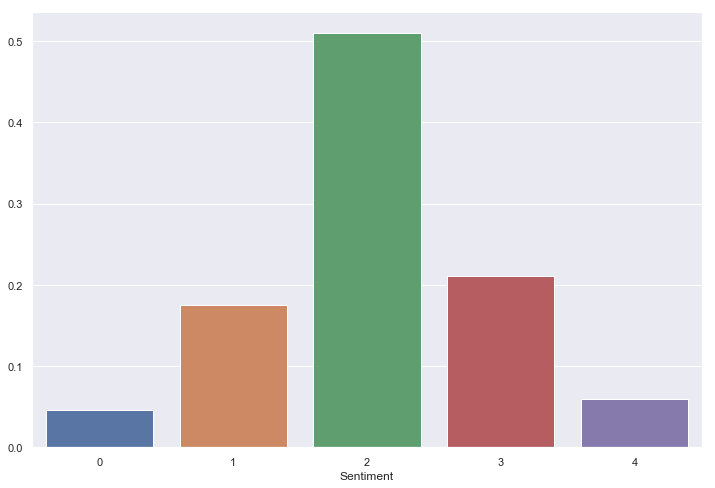

In [74]:
dist = df.groupby(["Sentiment"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values)

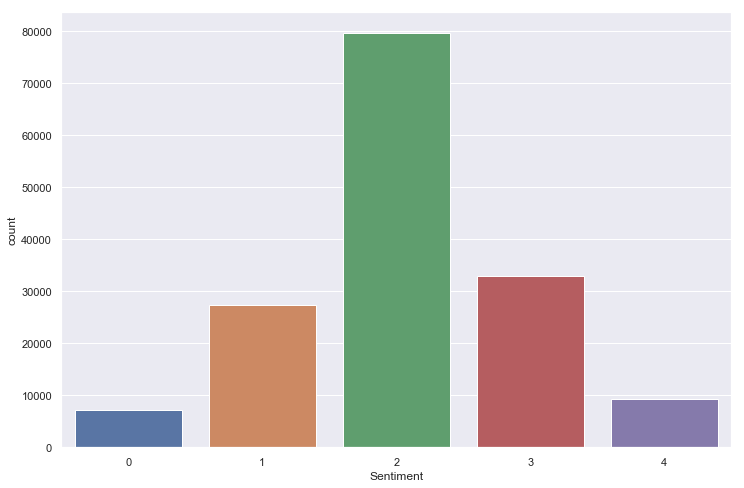

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.countplot(df.Sentiment)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [77]:
svc = LinearSVC(
    C=1.0,
    class_weight='balanced',
    dual=True,
    fit_intercept=True,
    intercept_scaling=1,
    loss='squared_hinge',
    max_iter=1000,
    multi_class='ovr',
    penalty='l2',
    random_state=0,
    tol=1e-05, 
    verbose=0
)

bow = CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern=r"(?u)\b\w\w+\b",
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=np.int64
)

pipeline = Pipeline([
    ('bow', bow),
    ('svc', svc),
])

In [15]:
skf = StratifiedKFold(n_splits=3)

X = df.Phrase
y = df.Sentiment

for train, test in skf.split(X, y):
    pipeline.fit(X[train], y[train])
    train_score = pipeline.score(X[train], y[train])
    test_score = pipeline.score(X[test], y[test])
    print("Train = {}, Test = {}".format(train_score, test_score))

/anaconda3/envs/ML_Alex_371/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train = 0.7349814490859109, Test = 0.56360770443274


/anaconda3/envs/ML_Alex_371/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train = 0.7404075355632449, Test = 0.5426758938869666


/anaconda3/envs/ML_Alex_371/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train = 0.7388362392110879, Test = 0.5413510707831904


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify = y)

In [114]:
tfidf = TfidfVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern=r"(?u)\b\w\w+\b",
    ngram_range=(1, 2),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=np.int64
)

In [115]:
tfidf.fit(X_train)

/anaconda3/envs/ML_Alex_371/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1567: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [116]:
#tfidf_2.vocabulary_

In [117]:
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [118]:
clf = LogisticRegression(multi_class="ovr")

In [119]:
clf.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
clf.score(X_test_tf,y_test)

0.6267378640776698

/anaconda3/envs/ML_Alex_371/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
pred = clf.predict(X_test_tf)

In [87]:
pred_proba = clf.predict_proba(X_test_tf)

In [88]:
pred[0]

3

In [89]:
pred_proba[0,:]

array([0.0167367 , 0.05081599, 0.28657789, 0.56408059, 0.08178883])

In [90]:
pred_proba.shape

(51500, 5)

In [91]:
dict_proba = {}
for i in range(pred_proba.shape[1]):
    dict_proba["Proba_"+str(i)] = pred_proba[:,i]
    
dict_proba["Label"] = pred

In [92]:
df_a = pd.DataFrame(data=dict_proba)
df_a.head()

,Proba_0,Proba_1,Proba_2,Proba_3,Proba_4,Label
0,0.016737,0.050816,0.286578,0.564081,0.081789,3
1,0.016761,0.244290,0.269050,0.450492,0.019408,3
2,0.059019,0.393182,0.479890,0.045561,0.022347,2
3,0.008352,0.118014,0.799616,0.065945,0.008074,2
4,0.011575,0.057159,0.681960,0.226514,0.022791,2


In [93]:
def plot_proba_dist_multiclass(clf_multi, X_test, y_test):
    """
    Func. that takes a previously trained multiclass classifier (one that outputs probabilities)
    and prints a series of distplots with the probability distribution of each predicted class
    VS the rest.
    This makes sense when the aforesaid classifier has been trained using One-VS-Rest logic.
    """
    
    pred = clf_multi.predict(X_test)
    pred_proba = clf_multi.predict_proba(X_test)
    
    dict_proba = {}
    for i in range(pred_proba.shape[1]):
        dict_proba["Proba_"+str(i)] = pred_proba[:,i]

    dict_proba["Label"] = pred
    
    df_a = pd.DataFrame(data=dict_proba)

    fig, axs = plt.subplots(pred_proba.shape[1], 1, figsize=(12, 6 * pred_proba.shape[1]))
    for i in range(pred_proba.shape[1]):
        for j in range(pred_proba.shape[1]):
            if i == j:
                _ = sns.distplot(df_a[df_a["Label"]==j].loc[:,"Proba_"+str(i)],bins=20,kde=False,color="g",ax=axs[i],norm_hist=True)
            else:
                _ = sns.distplot(df_a[df_a["Label"]==j].loc[:,"Proba_"+str(i)],bins=20,kde=False,color="b",ax=axs[i],norm_hist=True)

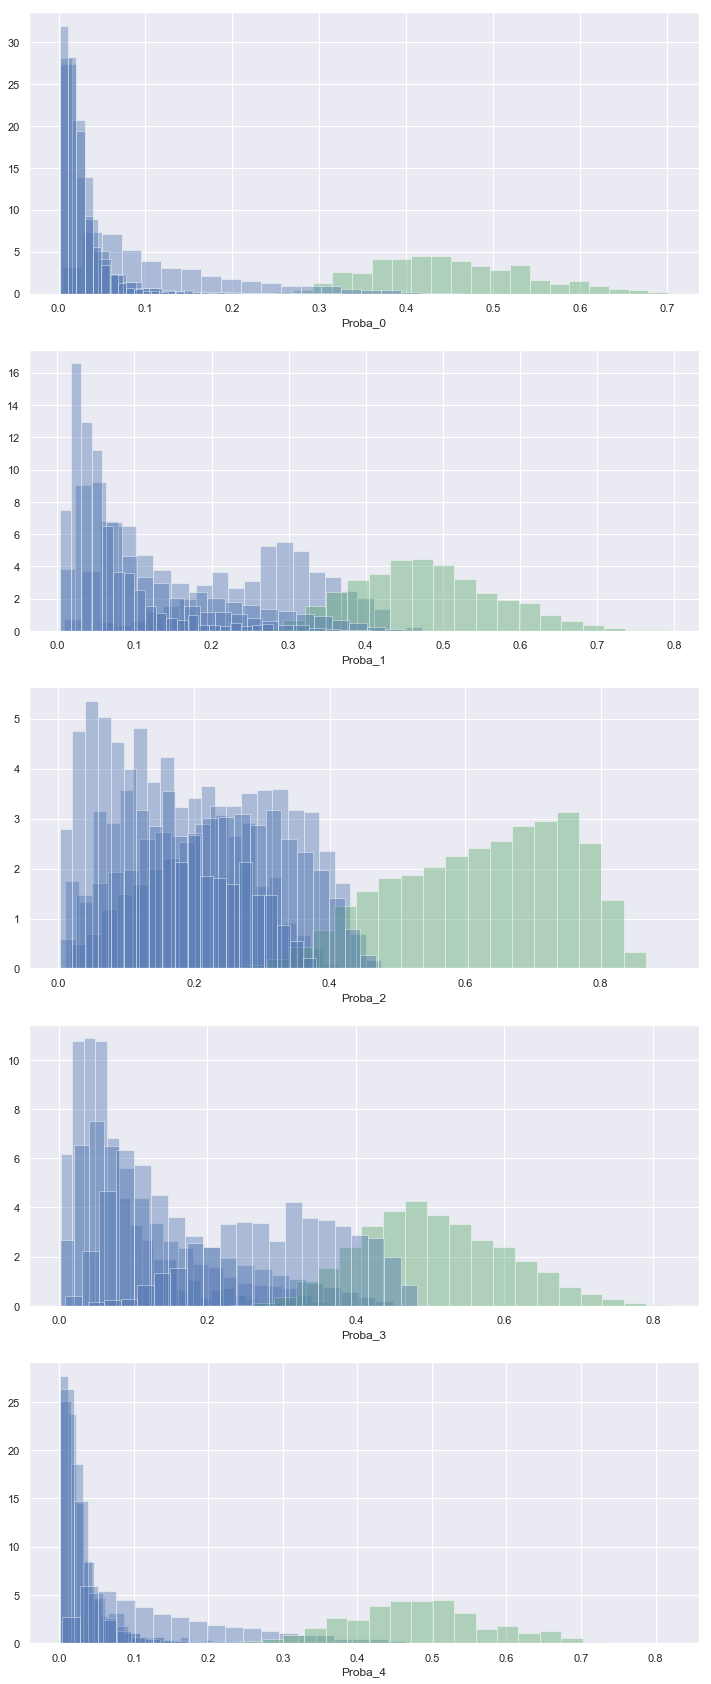

In [94]:
plot_proba_dist_multiclass(clf, X_test_tf, y_test)